# Testing a few available pretrained models

In [8]:
import tensorflow_hub as hub
import tensorflow as tf
from keras.models import load_model
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
model = hub.load("../srgan_model/")

2022-07-18 10:33:44.020840: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
size=100

In [4]:
train_dir = "/Users/sridhargk/code/sridhar211/SRGANupscaling/raw_data/set5"
n=5
hr_images = []
lr_images = []

for img in os.listdir(train_dir)[:n]:
    img_array = cv2.imread(train_dir + "/" + img)
    img_array = cv2.resize(img_array, (size*4,size*4))
    lr_img_array = cv2.resize(img_array,(size,size))
    hr_images.append(img_array)
    lr_images.append(lr_img_array)
lr_images = np.array(lr_images)
hr_images = np.array(hr_images)
lr_images.shape, hr_images.shape

((5, 100, 100, 3), (5, 400, 400, 3))

In [5]:
temp=tf.cast(lr_images, tf.float32)
sr_image=model(temp)
sr_image = np.asarray(sr_image)
sr_image = tf.clip_by_value(sr_image, 0, 255)
sr_image = tf.cast(sr_image, tf.uint8)

2022-07-14 16:41:44.078399: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


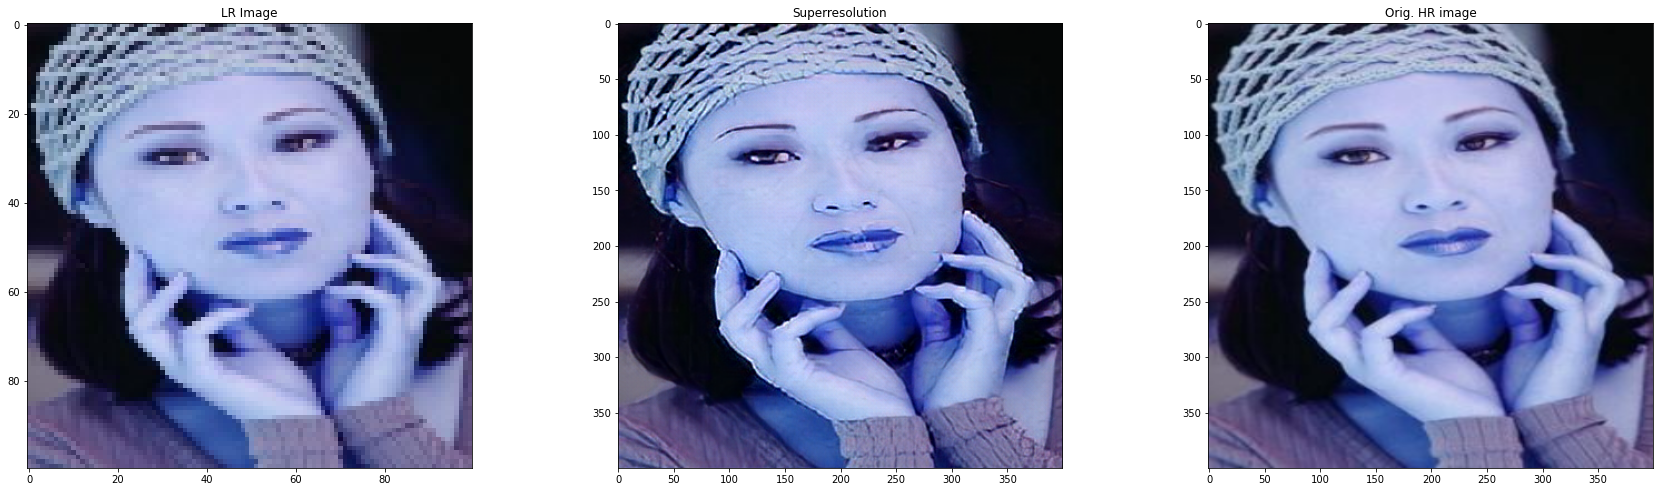

In [11]:
idx=3
plt.figure(figsize=(30, 18))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(lr_images[idx])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(sr_image[idx])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(hr_images[idx])

plt.show();

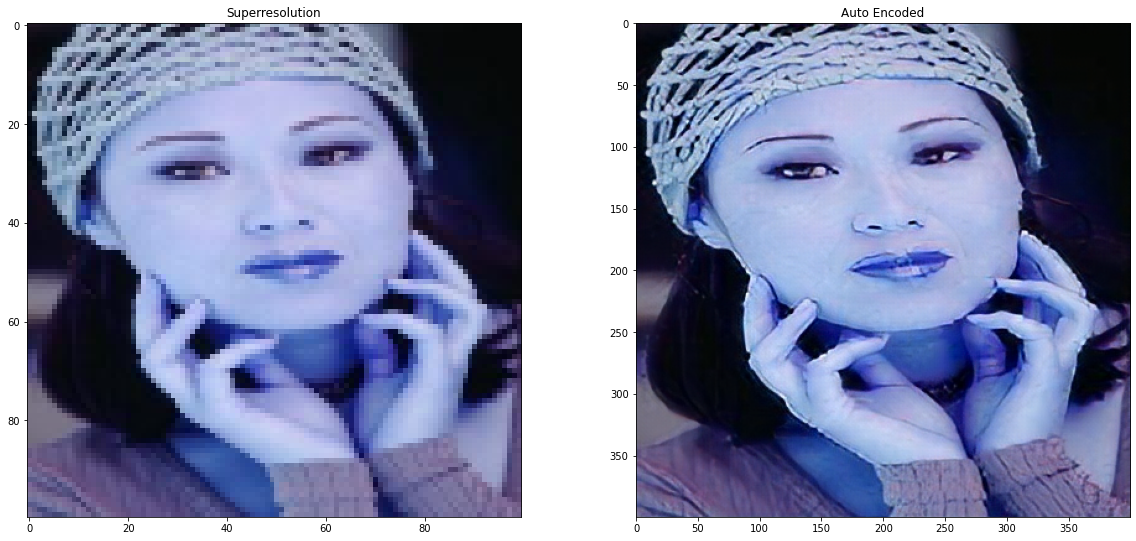

In [12]:
from SRGANupscaling.model import image_auto_encode
from SRGANupscaling.data import plot_encode_comparison

en_image= image_auto_encode(sr_image)

plot_encode_comparison(lr_images[idx],en_image[idx])